In [41]:
#!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip

--2023-03-25 10:28:25--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.0.162, 52.92.2.250, 52.218.0.240, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.0.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1791013744 (1.7G) [application/octet-stream]
Saving to: ‘tywbtsjrjv-1.zip’

tywbtsjrjv-1.zip    100%[===================>]   1.67G  54.9MB/s    in 37s     

2023-03-25 10:29:02 (45.9 MB/s) - ‘tywbtsjrjv-1.zip’ saved [1791013744/1791013744]



In [45]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

--2023-03-25 10:30:54--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2023-03-25 10:30:54--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.108.56, 3.5.72.121, 52.218.30.56, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.108.56|:443

In [37]:
#!wget blob:https://data.mendeley.com/00a68ef3-4943-44fd-bc7f-56c7ca2282fa

--2023-03-25 10:20:48--  ftp://blob/https://data.mendeley.com/00a68ef3-4943-44fd-bc7f-56c7ca2282fa
           => ‘00a68ef3-4943-44fd-bc7f-56c7ca2282fa’
Resolving blob (blob)... failed: Name or service not known.
wget: unable to resolve host address ‘blob’


In [46]:
!unzip -q file_downloaded.3

In [48]:
DATA_DIR = "/content/Plant_leave_diseases_dataset_with_augmentation"

In [ ]:
!pip install jax

In [49]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import jax.numpy as jnp

from google.colab import files
from keras.utils import load_img, img_to_array

In [50]:

IMAGE_SIZE = 128
BATCH_SIZE = 64
DROP = 0.9 

In [51]:
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)
# validation_datagen = ImageDataGenerator(rescale=1.0 / 255)




In [52]:
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE, #images getting inputed into the neural network through each epoch or each step
    subset='training',
    class_mode="categorical"
)

num_classes = len(train_generator.class_indices)

validation_generator = datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode="categorical"
)

Found 49197 images belonging to 39 classes.
Found 12289 images belonging to 39 classes.


In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(DROP),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [54]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [55]:
history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    # validation_steps=50,
    # verbose=2,
)

Epoch 1/20
769/769 [==============================] - 109s 127ms/step - loss: 2.7380 - accuracy: 0.2744 - val_loss: 1.6048 - val_accuracy: 0.5542
Epoch 2/20
769/769 [==============================] - 97s 126ms/step - loss: 1.6624 - accuracy: 0.5231 - val_loss: 1.0081 - val_accuracy: 0.7092
Epoch 3/20
769/769 [==============================] - 97s 126ms/step - loss: 1.2353 - accuracy: 0.6288 - val_loss: 0.7863 - val_accuracy: 0.7616
Epoch 4/20
769/769 [==============================] - 97s 126ms/step - loss: 1.0324 - accuracy: 0.6880 - val_loss: 0.6228 - val_accuracy: 0.8099
Epoch 5/20
769/769 [==============================] - 97s 126ms/step - loss: 0.8839 - accuracy: 0.7304 - val_loss: 0.5575 - val_accuracy: 0.8294
Epoch 6/20
769/769 [==============================] - 97s 126ms/step - loss: 0.7867 - accuracy: 0.7606 - val_loss: 0.5100 - val_accuracy: 0.8440
Epoch 7/20
769/769 [==============================] - 97s 126ms/step - loss: 0.6977 - accuracy: 0.7846 - val_loss: 0.4727 - val_a

In [57]:
import jax.numpy as jnp

from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediction on the uploaded image
  path = '/content/' + fn
  img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) 
  
  # scaling process
  x = img_to_array(img)
  x /= 255 
  x = jnp.expand_dims(x, axis=0)
  # flatten the output
  image = np.vstack([x])
  
  # prediction!
  classes = model.predict(image)
  
  print(classes[0], train_generator.class_indices)

  print(list(classes[0]).index(max(classes[0])))

Saving image (9).JPG to image (9).JPG
1/1 [==============================] - 0s 142ms/step
[1.7211813e-07 7.8444906e-17 4.9247654e-07 7.4381826e-18 2.0312594e-08
 3.1279641e-23 1.2162732e-11 4.0345187e-24 9.5146054e-01 1.6339076e-11
 4.8538785e-02 5.2859533e-10 4.6966099e-18 6.6769282e-20 5.5601291e-20
 1.1042279e-14 4.8975048e-19 2.9312737e-12 8.7674703e-24 3.0230719e-19
 5.7483943e-26 2.1764459e-14 4.4854815e-13 6.1400440e-24 1.1918427e-23
 2.5538301e-21 1.9029040e-11 9.5747161e-09 1.9235348e-24 1.7838765e-11
 3.6640643e-14 4.0024066e-08 8.0775213e-18 2.0542368e-14 3.0000207e-23
 4.5354592e-23 8.8849631e-19 2.8594405e-24 1.4682508e-18] {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___

Text(0.5, 1.0, 'Loss in training and validation')

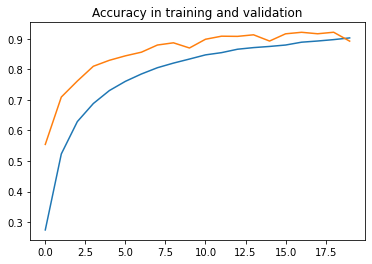

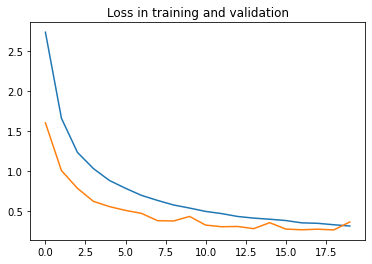

In [58]:
# get the metrics from history
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [60]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)


saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# download from colab
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___Septo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>